In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.templat

In [3]:
from sklearn.model_selection import TimeSeriesSplit

In [7]:
prices = pd.read_csv('../Datasets/prices_ts.csv', index_col=0, parse_dates=True)

In [8]:
prices.head()

,symbol,close,volume
date,,,
2010-01-04,AAPL,214.009998,123432400.0
2010-01-04,ABT,54.459951,10829000.0
2010-01-04,AIG,29.889999,7750900.0
2010-01-04,AMAT,14.300000,18615100.0
2010-01-04,ARNC,16.650013,11512100.0


In [46]:
apl1 = prices[prices['symbol']=='AAPL']
apl1.head()

,symbol,close,volume
date,,,
2010-01-04,AAPL,214.009998,123432400.0
2010-01-05,AAPL,214.379993,150476200.0
2010-01-06,AAPL,210.969995,138040000.0
2010-01-07,AAPL,210.580000,119282800.0
2010-01-08,AAPL,211.980005,111902700.0


In [62]:
apl = apl1.drop(['symbol', 'volume'], axis=1)

In [69]:
apl = pd.DataFrame(apl)
apl.head()

,close
date,
2010-01-04,214.009998
2010-01-05,214.379993
2010-01-06,210.969995
2010-01-07,210.580000
2010-01-08,211.980005


In [97]:
apl_ser = pd.Series(apl['close'], index=apl.index)

In [64]:
shifts = [0,1,2,3,4,5,6,7]

In [99]:
X2 = {i : apl_ser.shift(i) for i in shifts}

In [94]:
X2

{0:                  close
 date                  
 2010-01-04  214.009998
 2010-01-05  214.379993
 2010-01-06  210.969995
 2010-01-07  210.580000
 2010-01-08  211.980005
 ...                ...
 2016-12-23  116.519997
 2016-12-27  117.260002
 2016-12-28  116.760002
 2016-12-29  116.730003
 2016-12-30  115.820000
 
 [1762 rows x 1 columns], 1:                  close
 date                  
 2010-01-04         NaN
 2010-01-05  214.009998
 2010-01-06  214.379993
 2010-01-07  210.969995
 2010-01-08  210.580000
 ...                ...
 2016-12-23  116.290001
 2016-12-27  116.519997
 2016-12-28  117.260002
 2016-12-29  116.760002
 2016-12-30  116.730003
 
 [1762 rows x 1 columns], 2:                  close
 date                  
 2010-01-04         NaN
 2010-01-05         NaN
 2010-01-06  214.009998
 2010-01-07  214.379993
 2010-01-08  210.969995
 ...                ...
 2016-12-23  117.059998
 2016-12-27  116.290001
 2016-12-28  116.519997
 2016-12-29  117.260002
 2016-12-30  116.760002
 

In [115]:
y1 = apl.values

In [117]:
test = Ridge()
test.fit(X1, y1)

Ridge()

In [83]:
index_arr = np.array(apl.index.values)

In [113]:
X = pd.DataFrame(X2)
X1 = X.fillna(np.nanmedian(X)).values
X1

array([[214.009998, 318.620003, 318.620003, ..., 318.620003, 318.620003,
        318.620003],
       [214.379993, 214.009998, 318.620003, ..., 318.620003, 318.620003,
        318.620003],
       [210.969995, 214.379993, 214.009998, ..., 318.620003, 318.620003,
        318.620003],
       ...,
       [116.760002, 117.260002, 116.519997, ..., 116.949997, 116.639999,
        115.970001],
       [116.730003, 116.760002, 117.260002, ..., 117.059998, 116.949997,
        116.639999],
       [115.82    , 116.730003, 116.760002, ..., 116.290001, 117.059998,
        116.949997]])

In [29]:
cv = TimeSeriesSplit(n_splits=10)

In [30]:
from sklearn.utils import resample

In [33]:
from sklearn.linear_model import Ridge

In [132]:
def bootstrap_interval(data, percentiles=(2.5,97.5), n_boots=100):
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for i in range(n_boots):
    
        random_sample = resample(data)
        bootstrap_means[i] = random_sample.mean(axis=0)
    
    percentiles= np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles


In [122]:
y1.shape

(1762, 1)

In [118]:
X1.shape

(1762, 8)

In [126]:
cv3 = TimeSeriesSplit(n_splits=100)
model = Ridge()

coefficients = np.zeros([100, X1.shape[-1]])

for i, (tr, tt) in enumerate(cv3.split(X1,y1)):
    model.fit(X1[tr], y1[tr])
    coefficients[i] = model.coef_

In [134]:
interval = bootstrap_interval(coefficients)

In [140]:
interval[0]

array([ 9.99969367e-01,  2.01387433e-05,  2.56670965e-07, -1.86642805e-06,
        5.32178698e-07, -1.09945416e-07,  6.01733350e-08, -9.34525915e-07])

In [142]:
interval[1]

array([ 9.99978338e-01,  2.87361335e-05,  6.84172711e-07, -1.14319612e-06,
        8.27205386e-07,  4.55739067e-07,  4.55422344e-07, -4.46722512e-07])

In [139]:
interval.shape

(2, 8)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

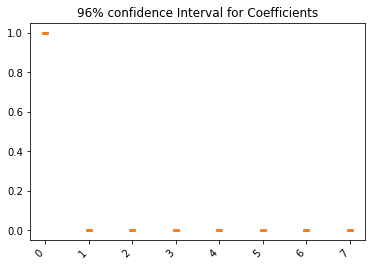

In [143]:
fig, ax = plt.subplots()
ax.scatter(X.columns, interval[0], marker='_', lw=3)
ax.scatter(X.columns, interval[1], marker='_', lw=3)
ax.set(title='96% confidence Interval for Coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
